# Варіант 88
Знайти найменший корiнь нелiнiйного рiвняння $x^4+4x-2=0$ методом релаксацiї i Ньютона з точнiстю $\epsilon =10^{-4}$. Знайти апрiорну та апостерiорну оцiнку кiлькостi крокiв. Початковий промiжок та початкове наближення обрати однакове для обох методiв (якщо це можливо), порiвняти результати роботи методiв мiж собою.

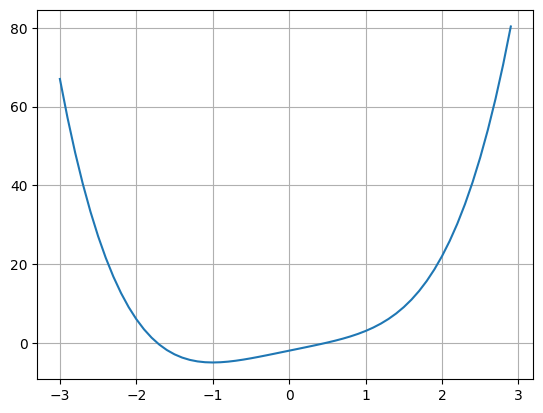

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# похибка
eps = 1e-4

# модель функції
x = sp.symbols('x')
f = x**4 + 4*x - 2
fl = sp.lambdify(x, f)

# графік функції
def plot():
    xs = np.arange(-3, 3, 0.1)
    ys = fl(xs)
    fig, ax = plt.subplots()
    ax.grid()
    ax.plot(xs, ys)
plot()


Бачимо, що найменший корінь рівняння знаходиться на проміжку $[-2, -1.5]$.

In [2]:
# межі пошуку
start = -2
finish = -1.5
xs = np.arange(start, finish, eps)
print(fl(start)*fl(finish))

-17.625


In [3]:
# перша та друга похідні
df = sp.diff(f, x)
ddf = sp.diff(df, x)

dfl = sp.lambdify(x, df)
ddfl = sp.lambdify(x, ddf)

print(f'first derivative: {df}')
print(f'second derivative: {ddf}')

first derivative: 4*x**3 + 4
second derivative: 12*x**2


## Метод релаксації

In [4]:
def relaxation():
    min1 = min(abs(dfl(xs)))
    max1 = max(abs(dfl(xs)))
    print(f'm1: {min1}, M1: {max1}')

    xp = start
    x0 = (start + finish) / 2
    xi = x0
    tau = 2/(max1 + min1)
    print(f'tau: {tau}')

    # Перевірка на збіжність
    v = tau * dfl(x0)
    if -2 < v and v < 0:
        print('Checked')
    

    xis = []
    # f' < 0 => x_n+1 = x_n + tf(x_n)
    while (abs(xi - xp) > eps):
        xp = xi
        xis.append(xp)
        xi = xp + tau * fl(xp)

    z0 = abs(x0 - xi)
    q = (max1 - min1)/(max1 + min1)
    n = int(np.log(abs(z0)/eps)/np.log(1/q)) + 1
    print("Marks:")
    print("  a priory: ", n)
    print("  a posteriori: ", len(xis))

    print('Iterations: ')
    for i in range(len(xis)):
        print(f'  {i + 1}: {xis[i]}')
relaxation()

m1: 9.502700180005487, M1: 28.0
tau: 0.053329493353822484
Checked
Marks:
  a priory:  8
  a posteriori:  4
Iterations: 
  1: -1.75
  2: -1.7297931216589033
  3: -1.7279802355638818
  4: -1.727779098451927
